In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from wordcloud import WordCloud

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from src import utils, nlp_topic_utils

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\morga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Visualizations for Website

## Import Data

In [30]:
wallstreet = pd.read_csv('data/wallstreet_master.csv', engine='python')

In [31]:
wallstreet.head()

,postID,threadID,threadTitle,subforum,authorName,postAuthorMembership,authorReputation,postSequence,contentWithHTMLTag,post_date_dt,author_join_date,post_date_only,num_days_member_when_posted,processed_text,parts_of_speech,wordcloud_text
0,6,5,Hi,Introductions,Punka421,New member,-3,1,"<div class=""entry-content"">\n<p>Just thought I...",2016-10-26 13:58:36,2016-10-26 00:00:00,2016-10-26,0.0,"['thought', 'introduce', 'new', 'community', '...","[('thought', 'VBN'), ('introduce', 'VB'), ('ne...",thought introduce new community trying learn m...
1,7,5,Hi,Introductions,WSM,Administrator,66,2,"<div class=""entry-content"">\n<p>Hello <img alt...",2016-10-26 14:04:04,2016-10-02 00:00:00,2016-10-26,24.0,"['hello', 'nice', 'see', 'regard']","[('hello', 'JJ'), ('nice', 'JJ'), ('see', 'NN'...",hello nice see regard
2,8,6,WSM Updates - Changelog (Page 1 of 4),Announcements,WSM,Administrator,74,1,"<div class=""entry-content"">\n<p>Hello everyone...",2016-10-26 16:54:27,2016-10-02 00:00:00,2016-10-26,24.0,"['hello', 'everyone', 'like', 'tell', 'impleme...","[('hello', 'RB'), ('everyone', 'NN'), ('like',...",hello everyone like tell implemented new featu...
3,11,5,Hi,Introductions,Estrazy,Banned,0,3,"<div class=""entry-content"">\n<p>Hello Punka! n...",2016-10-27 14:00:16,2016-10-27 00:00:00,2016-10-27,0.0,"['hello', 'punka', 'nice', 'meet', 'asked', 's...","[('hello', 'NN'), ('punka', 'NN'), ('nice', 'J...",hello punka nice meet asked stay secure tip ca...
4,13,6,WSM Updates - Changelog (Page 1 of 4),Announcements,WSM,Administrator,74,2,"<div class=""entry-content"">\n<h5>Changelog fro...",2016-11-02 15:42:27,2016-10-02 00:00:00,2016-11-02,31.0,"['changelog', 'wednesday', 'november', 'lot', ...","[('changelog', 'NN'), ('wednesday', 'JJ'), ('n...",changelog wednesday november lot small issue b...


## Daily Forum Posts

In [21]:
def plot_daily_post_freq(series):
    '''
    Interactive line plot showing the number of plots per day.
    '''
    daily_post_freq = pd.DataFrame(series.value_counts()).reset_index()
    daily_post_freq.columns = ['date', 'count']
    daily_post_freq.sort_values(['date'], axis=0, inplace=True)
    fig = px.line(data_frame=daily_post_freq, x='date', y='count', labels= {'date': 'Date', 'count': '# of Posts'})
    fig.show();

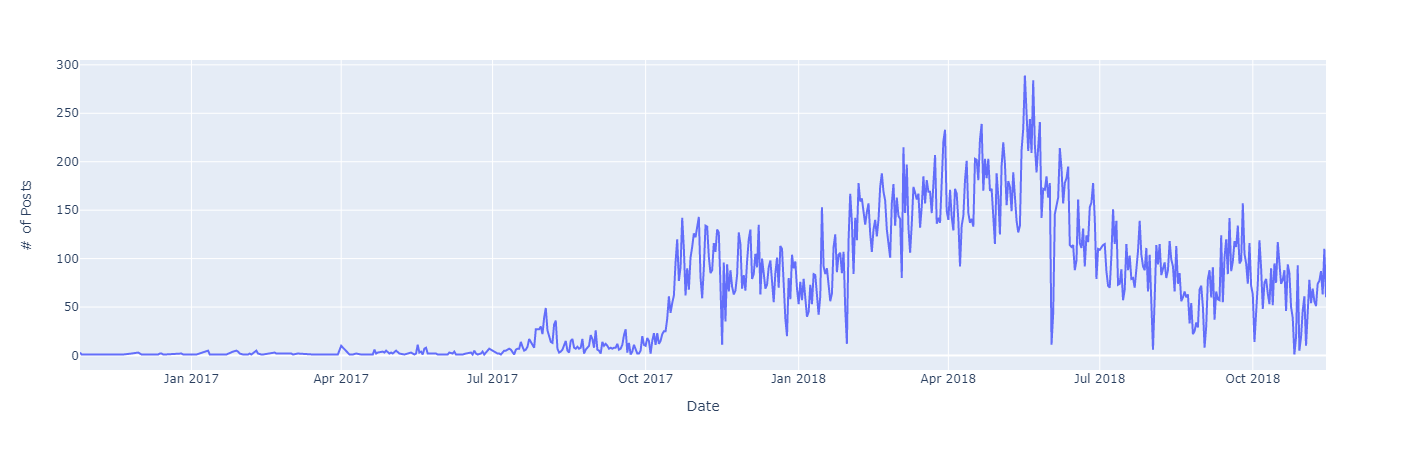

In [9]:
series = wallstreet['post_date_only']

plot_daily_post_freq(series)

## Wordcloud

In [36]:
def display_wordcloud(pd_series, max_words):
    '''
    Generates wordcloud.
    '''

    series_as_str = pd_series.astype('str')
    joined_wordcloud_text = ' '.join(str_series)

    wordcloud = WordCloud(background_color='white', max_words=max_words, contour_color='steelblue')
    wordcloud.generate(joined_wordcloud_text)

    plt.figure(figsize=(20,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');

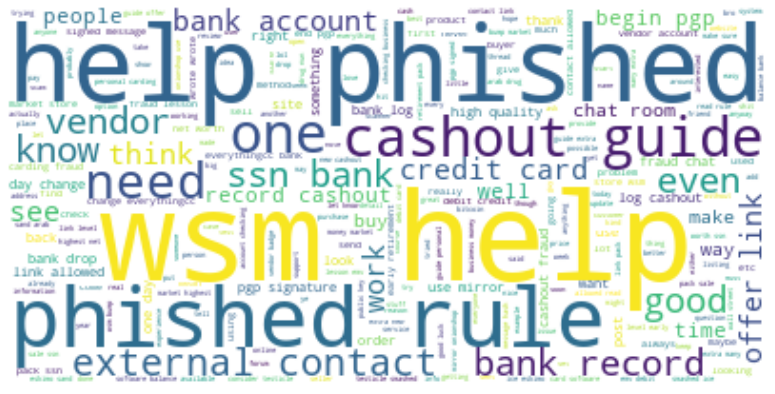

In [37]:
display_wordcloud(wallstreet['wordcloud_text'], 10000)

## Sentiment Time-Series Analysis

In [47]:
si_analyzer = SentimentIntensityAnalyzer()
wallstreet['compound_sentiment'] = wallstreet['wordcloud_text'].apply(lambda x: si_analyzer.polarity_scores(x)['compound'])

In [44]:
arr1 = wallstreet['sentiment_all']

utils.stats_summary(arr1)

STATS SUMMARY:
Mean:  0.306369553909908
Median:  0.4019
Std. Dev.:  0.4883572393000327
Max value:  1.0
Min value:  -0.9998
# of Obs.:  45372


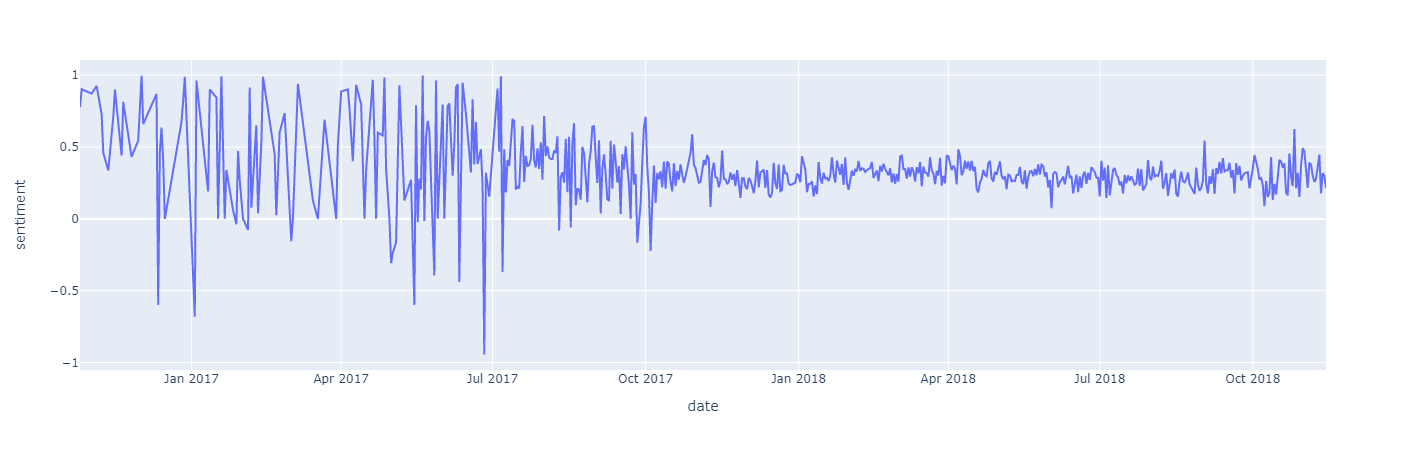

In [53]:
# def plot_sentiment_time_series(sentiment_arr)

groupby1 = wallstreet.groupby('post_date_only')['compound_sentiment'].mean()
daily_sentiment = pd.DataFrame(groupby1).reset_index()
daily_sentiment.columns=['date', 'sentiment']
fig = px.line(data_frame=daily_sentiment, x='date', y='sentiment')#, labels= {'date': 'Date', 'count': '# of Posts'})
fig.show();


In [56]:
groupby1 = wallstreet.groupby('post_date_only')['compound_sentiment'].aggregate(['min', 'max', 'mean', 'std', 'count'])

In [57]:
groupby1

,min,max,mean,std,count
post_date_only,,,,,
2016-10-26,0.4215,0.9825,0.777567,0.309534,3
2016-10-27,0.9022,0.9022,0.902200,NaN,1
2016-11-02,0.8720,0.8720,0.872000,NaN,1
2016-11-05,0.9254,0.9254,0.925400,NaN,1
2016-11-08,0.7269,0.7269,0.726900,NaN,1
...,...,...,...,...,...
2018-11-10,-0.7430,0.9991,0.446796,0.488157,77
2018-11-11,-0.8885,0.9947,0.177511,0.436239,87
2018-11-12,-0.9169,0.9798,0.317108,0.488109,63
